# Customer Segmentation
<br>
This repo contains the Customer Segmentation project as part of my data science portfolio. There are two parts in this project:
1. [Understanding Customer Segmentation](#understanding-customer-segmentation)
2. [Implementation in Python](#implementation-in-python)

The first part - Understanding Customer Segmentation is for beginners who are new to this marketing concept. Particularly, it explains the concept of customer segmentation using RFM (Recency, Frequency, Monetary) analysis. The second part - Implementation in Python contains the Python code to implement this concept using public dataset from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). References are provided at the end of this project to give due credit to the authors of journal articles and resources that contributed to the completion of this project.

***
# <a name="understanding-customer-segmentation"> Understanding Customer Segmentation
According to marketing gurus, Philip Kotler and Gary Armstrong, customer segmentation is defined as “dividing a market into distinct groups of buyers who have distinct needs, characteristics, or behaviour and who might require separate products or marketing mixes” (Armstrong and Kotler, 2005: 54). 

An excerpt from the textbook Marketing Management (2012) explains, 


    To compete more effectively, many companies are now embracing target marketing. Instead of scattering their marketing
    efforts, they’re focusing on those consumers they have the greatest chance of satisfying.
    Effective target marketing requires that marketers:
    1. Identify and profile distinct groups of buyers who differ in their needs and wants (market segmentation).
    2. Select one or more market segments to enter (market targeting).
    3. For each target segment, establish and communicate the distinctive benefit(s) of the company’s market offering
    (market positioning).

In simpler words, as companies do not have infinite resources, they need to divide their customers into smaller segments or groups so that they can identify high potential segments and focus their attention on those segments. There are many ways to segment customers, for example by age groups, genders, geograpical locations, education levels, etc. One of the most popular and effective methods to segment customers is using RFM (Recency, Frequency, Monetary) analysis. 

According to Chen et al. (2012), RFM (Recency, Frequency, Monetary) analysis is a behaviour-based approach of grouping customers into segments. It groups the customers on the basis of their previous purchase transactions i.e. how recently, how often, and how much did a customer buy. RFM segments customers into various groups or clusters and helps managers to identify more important / profitable segments to focus their attention and effort. It also helps marketers to identify customers who are more likely to respond to promotions and also for future personalization services.  

- Recency (R): Who have purchased recently? It means the number of days since last purchase (least recency is better)
- Frequency (F): Who have purchased frequently? It means the total number of purchases. (high frequency is better)
- Monetary (M): Who have high purchase amount? It means the total money customer spent (high monetary is better)

RFM analysis is based on the Pareto principle that 80% of your business comes from 20% of your customers. The 3-dimensional approach provides a more holistic view on segmentation compared to the traditional single dimension approach which often segment customers based on sales value or volume only. For example, there may be a segment of customers who is the big spender (in terms of sales value) but what if they only purchase once or twice a year? Or they may be a customer segment who purchase frequently but what if the value is very small? Are they worth the marketers' time and effort? RFM analysis helps to overcome these shortcomings by providing a more holistic and effective approach to customer segmentation.


***
# <a name="implementation-in-python">Implementation in Python</a> #
Customer Segmentation using RFM analysis can be implemented in Python following the steps below. There are no special machine learning libraries needed. If you are using Jupyter Notebook via Anaconda, you are good to go with the pre-installed libraries. In fact, [DataCamp](https://www.datacamp.com/community/tutorials/introduction-customer-segmentation-python) has an awesome tutorial which this project draws on.

Steps:
- Calculate the Recency, Frequency, Monetary values for each customer
- Group all customers into bins using quartiles
- Sort the customer RFM score in ascending order
<br>


### Dataset ###
The [dataset](https://archive.ics.uci.edu/ml/datasets/online+retail) that is used in this project is publicly available from UCI Machine Learning Repository. It is a transactional dataset which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based online retailer.
<br>
<br>
<table><tr><td><img height="400" width="600" src="uci.jpg"></td></tr></table>


***
### Import Libraries and Load Dataset

In [1]:
# import modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime as dt

In [2]:
# load the excel file into a dataframe
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# check the summary info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**Note**: The dataframe contains 541,909 rows and 8 columns. 

***
### Check for Missing Values

The columns that are required for RFM analysis are `InvoiceNo`, `Quantity`, `InvoiceDate`, `UnitPrice` and `CustomerID`. We need to make sure there are no missing values in these columns or that they are treated prior to the analysis.

In [4]:
# check for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Note**: The are 135,080 missing values for the column `CustomerID` which is important for RFM analysis. In this case, there is not much we can do as CustomerIDs are unique values, it does not make sense to impute the missing values with calculated values. So, we will only work with the portion of the dataframe with no missing values

In [5]:
# select the portion of dataframe with no missing values for the column "CustomerID"
df_data = df[pd.notnull(df["CustomerID"])]
df_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


**Note**: The are 406,829 rows with no missing values

***
### Remove Duplicates
We can check for any duplicate values in the dataframe using function `.duplicated()` and remove them accordingly using function `drop_duplicates()`. 

In [7]:
print("There are {} duplicated values.".format(df_data.duplicated().sum()))
df_data[df_data.duplicated(keep=False)].head(10)

There are 5225 duplicated values.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
548,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


**Note**: From the table above, we can see that item 485 and 539 are duplicates, item 489 and 527 are duplicates and so on... The duplicated values need to be removed. We will use `.drop_duplicates()` function to drop duplicates except for the first occurrence.

In [8]:
filtered_data = df_data.drop_duplicates()

In [9]:
# check for duplicates after removing duplicates
filtered_data.duplicated().sum()

0

**Note**: There are no more duplicate values

In [10]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      401604 non-null object
StockCode      401604 non-null object
Description    401604 non-null object
Quantity       401604 non-null int64
InvoiceDate    401604 non-null datetime64[ns]
UnitPrice      401604 non-null float64
CustomerID     401604 non-null float64
Country        401604 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


**Note**: Now the filtered data is left with 401,604 rows which is the result of 406,829 minus 5,225 duplicates

***
#### Data Insights
Since the data is from an online retailer, we will look at where their customers originate from i.e. countries

In [11]:
# filter customers by top 10 countries in percentage
filtered_data.Country.value_counts(normalize=True)[:10]

United Kingdom    0.888258
Germany           0.023605
France            0.021103
EIRE              0.018613
Spain             0.006295
Netherlands       0.005904
Belgium           0.005152
Switzerland       0.004674
Portugal          0.003663
Australia         0.003132
Name: Country, dtype: float64

**Note**: United Kingdom alone accounts for 88.8% of all countries

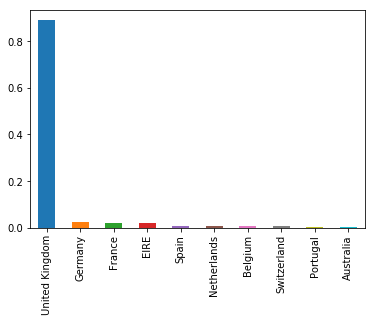

In [12]:
# visualize in bar chart
filtered_data.Country.value_counts(normalize=True)[:10].plot(kind="bar")

**Note**: We can filter and only select customers from United Kingdom, which are considered as "local customers" for the online retailer since the online retailer is UK-based. This will serves as a good starting point for our analysis and also for the online retailer to focus their marketing effort

In [13]:
# filter customers from United Kingdom
uk_data = filtered_data[filtered_data["Country"] == "United Kingdom"]

In [14]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356728 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      356728 non-null object
StockCode      356728 non-null object
Description    356728 non-null object
Quantity       356728 non-null int64
InvoiceDate    356728 non-null datetime64[ns]
UnitPrice      356728 non-null float64
CustomerID     356728 non-null float64
Country        356728 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.5+ MB


**Note**: As shown above, the UK dataset has 356,728 rows with no missing values

In [15]:
# get summary statistics for the numeric columns of the dataframe
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,356728.000000,356728.000000,356728.000000
mean,11.198644,3.268255,15543.795284
std,264.998044,71.162330,1594.286219
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14191.000000
50%,4.000000,1.950000,15513.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


**Note**: From the summary statistics above, we notice that the minimum value for `Quantity` is strangely negative -80995 which does not make sense. Upon careful study of the data description from UCI Machine Learning Repository website where this dataset is obtained, it is discovered that some transaction records in this dataset are "cancellations". This can be noticed from the column `InvoiceNo` which is a 6-digit integral number uniquely assigned to each transaction. But it is stored as "Object" instead of "Integer", this is because some of the `InvoiceNo` starts with letter 'C', which indicates a cancellation.

In [16]:
# showing cancelled transactions
uk_data[uk_data["InvoiceNo"].str.startswith("C", na=False)].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


**Note**: From the cancellation cases above, the `InvoiceNo` starts with "C" and the `Quantity` is negative value, therefore these cancelled transactions have to be taken out.

In [17]:
# filter only valid transactions i.e. non-cancellation
uk_data_valid = uk_data[~uk_data["InvoiceNo"].str.startswith("C", na=False)].copy()

In [18]:
uk_data_valid.describe()

,Quantity,UnitPrice,CustomerID
count,349227.000000,349227.000000,349227.000000
mean,12.181295,2.972124,15548.333625
std,191.797470,17.990307,1594.403077
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,14191.000000
50%,4.000000,1.950000,15518.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,8142.750000,18287.000000


In [19]:
uk_data_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349227 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      349227 non-null object
StockCode      349227 non-null object
Description    349227 non-null object
Quantity       349227 non-null int64
InvoiceDate    349227 non-null datetime64[ns]
UnitPrice      349227 non-null float64
CustomerID     349227 non-null float64
Country        349227 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.0+ MB


**Note**: Now the `Quantity` column is normal with only positive values, and the dataset is left with 349,227 rows

***
### Compute RFM Values
As mentioned earlier, we only need five columns from the raw data i.e. `CustomerID`, `InvoiceDate`, `InvoiceNo`, `Quantity`, and `UnitPrice`. 
- `CustomerId` will uniquely define our customers
- `InvoiceDate` help us calculate recency of purchase (Recency)
- `InvoiceNo` helps us to count the number of time transaction performed (Frequency)
- `Quantity` purchased in each transaction and `UnitPrice` of each unit will help to calculate the total purchased amount (Monetary)

#### Recency
To calculate Recency, we calculate the number of days between present date (i.e. Today) and date of last purchase of each customer. We first define today's date and then get the `.max()` function of `InvoiceDate` to calculate the number of days between today and date of last purchase. 

In [20]:
# convert the InvoiceDate column to datetime data type
uk_data_valid['InvoiceDate'] = pd.to_datetime(uk_data_valid['InvoiceDate'])

In [21]:
uk_data_valid.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [22]:
# check the maximum and minimum date of the dataset
uk_data_valid['InvoiceDate'].max(), uk_data_valid['InvoiceDate'].min()

(Timestamp('2011-12-09 12:49:00'), Timestamp('2010-12-01 08:26:00'))

In [23]:
# assume we are doing this analysis on the next day after this data is generated
TODAY = dt.datetime(2011,12,10)

# testing Recency
least_recency = TODAY - uk_data_valid['InvoiceDate'].max()
highest_recency = TODAY - uk_data_valid['InvoiceDate'].min()
least_recency.days, highest_recency.days

(0, 373)

**Note**: In order to ensure accuracy, we will select a customer as a test subject to calculate the RFM value individually and then cross-check with the final calculations. Say, we select the customer with CustomerID == 12747

In [24]:
# example recency for CustomerID == 12747
test_recency = TODAY - uk_data_valid[uk_data_valid["CustomerID"] == 12747].InvoiceDate.max()
test_recency.days

2

<br>
#### Frequency
To calculate Frequency, we calculate the number of purchases for each customer.

In [25]:
# example frequency for CustomerID == 12747
print("Transaction records: ", len(uk_data_valid[uk_data_valid["CustomerID"] == 12747]))
uk_data_valid[uk_data_valid["CustomerID"] == 12747].head(10)

Transaction records:  103


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9754,537215,85124C,GREEN JUICY FRUIT PHOTO FRAME,12,2010-12-05 15:38:00,2.55,12747.0,United Kingdom
9755,537215,85124B,BLUE JUICY FRUIT PHOTO FRAME,6,2010-12-05 15:38:00,2.55,12747.0,United Kingdom
9756,537215,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2010-12-05 15:38:00,1.69,12747.0,United Kingdom
9757,537215,85062,PEARL CRYSTAL PUMPKIN T-LIGHT HLDR,24,2010-12-05 15:38:00,1.65,12747.0,United Kingdom
9758,537215,85064,CREAM SWEETHEART LETTER RACK,6,2010-12-05 15:38:00,5.45,12747.0,United Kingdom
9759,537215,82484,WOOD BLACK BOARD ANT WHITE FINISH,36,2010-12-05 15:38:00,5.55,12747.0,United Kingdom
9760,537215,21136,PAINTED METAL PEARS ASSORTED,8,2010-12-05 15:38:00,1.69,12747.0,United Kingdom
27390,538537,22795,SWEETHEART RECIPE BOOK STAND,16,2010-12-13 10:41:00,5.95,12747.0,United Kingdom
27391,538537,48138,DOORMAT UNION FLAG,2,2010-12-13 10:41:00,7.95,12747.0,United Kingdom
27392,538537,82494L,WOODEN FRAME ANTIQUE WHITE,24,2010-12-13 10:41:00,2.55,12747.0,United Kingdom


In [26]:
print("No of unique InvoiceNo: ", uk_data_valid[uk_data_valid["CustomerID"] == 12747].InvoiceNo.unique().size)
uk_data_valid[uk_data_valid["CustomerID"] == 12747].InvoiceNo.unique()

No of unique InvoiceNo:  11


array([537215, 538537, 541677, 545321, 551992, 554549, 558265, 563949,
       569397, 577104, 581163], dtype=object)

**Note**: For CustomerID == 12747, while there are 103 transaction records, but there are actually only 11 unique InvoiceNo, this indicates that this customer has made 11 purchases which consists of multiple items per purchase

<br>
#### Monetary
To calculate Monetary, we calculate the sum of purchase price for each customer. To do this, we create a new column `TotalPrice` which is the product of `Quantity` purchased in each transaction and `UnitPrice` of each unit

In [27]:
uk_data_valid['TotalPrice'] = uk_data_valid['Quantity'] * uk_data_valid['UnitPrice']

In [28]:
uk_data_valid.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


In [29]:
# example monetary for CustomerID == 12747
uk_data_valid[uk_data_valid["CustomerID"] == 12747].TotalPrice.sum()

4196.009999999999

**Note**: Therefore, for our test subject, CustomerID == 12747, the Recency, Frequency and Monetary values are (2, 11, 4196)

***
### Group by RFM Values

In [30]:
rfm = uk_data_valid.groupby("CustomerID").agg({"InvoiceDate": lambda date: (TODAY - date.max()).days,
                                        "InvoiceNo": lambda num: num.nunique(),
                                        "TotalPrice": lambda price: price.sum()})

In [31]:
# Change the name of columns
rfm.columns=["recency", "frequency", "monetary"]

In [32]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,11,4196.01
12748.0,0,210,33053.19
12749.0,3,5,4090.88
12820.0,3,4,942.34


**Note**: Cross-check with the test subject above, for CustomerID == 12747, the RFM values (2, 11, 4196) matches the values in row 2 of the table above. Therefore, this indicates our calculations are correct.

In [33]:
print("Recency: {} to {}".format(rfm.recency.min(), rfm.recency.max()))
print("Frequency: {} to {}".format(rfm.frequency.min(), rfm.frequency.max()))
print("Monetary: {} to {}".format(rfm.monetary.min(), rfm.monetary.max()))

Recency: 0 to 373
Frequency: 1 to 210
Monetary: 0.0 to 259657.3


***
### Compute Quantile of RFM Values

Using RFM analysis, customers with the lowest recency, highest frequency and highest monetary amounts are considered as top customers. However, the RFM values alone are difficult to comprehend for so many customers at once. We need to segregate the customers into different "BUCKETS" based on their RFM values. To do this, we can use the `qcut()` function. It is a Quantile-based discretization function that discretize variable into equal-sized buckets based on rank or based on sample quantiles. For example, 1000 values for 4 quantiles would produce a categorical object indicating quantile membership for each customer. More on [qcut()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html).

Note that for `qcut()` to work, the bin edges must be unique. However, for the `frequency` column the bin boundaries are not unique, as a result we have to drop 1 bin and can only discretize into 3 bins instead of 4 bins, which is good enough for our analysis as we will be focusing on the bin 1 customers.

In [34]:
rfm["r_quartile"] = pd.qcut(rfm["recency"], 4, ["1","2","3","4"])
rfm["f_quartile"] = pd.qcut(rfm["frequency"], 4, ["3","2","1"], duplicates="drop")
rfm["m_quartile"] = pd.qcut(rfm["monetary"], 4, ["4","3","2","1"])

In [35]:
rfm.head(5)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,4,3,1
12747.0,2,11,4196.01,1,1,1
12748.0,0,210,33053.19,1,1,1
12749.0,3,5,4090.88,1,2,1
12820.0,3,4,942.34,1,2,2


In [36]:
# combine all three quartiles in a single column to help rank customers by segments
rfm["RFM_Score"] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,3,1,431
12747.0,2,11,4196.01,1,1,1,111
12748.0,0,210,33053.19,1,1,1,111
12749.0,3,5,4090.88,1,2,1,121
12820.0,3,4,942.34,1,2,2,122


**Note**: Interestingly, our test subject, CustomerID == 12747, with RFM values (2, 11, 4196) this customer actually rank in bin 1 in all three Recency, Frequency and Monetary dimensions with a RFM Score of "111". It would be helpful to sort the RFM Score in order to identify the Top 10 customers.

In [37]:
# filter out Top 10 customers by selecting RFM Score = 111 and then sort by descending Monetary and Frequency values
rfm[rfm["RFM_Score"]=="111"].sort_values(by=["monetary", "frequency"], ascending=False).head(10)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
18102.0,0,60,259657.30,1,1,1,111
17450.0,8,46,194390.79,1,1,1,111
17511.0,2,31,91062.38,1,1,1,111
16684.0,4,28,66653.56,1,1,1,111
14096.0,4,17,65164.79,1,1,1,111
13694.0,3,50,65039.62,1,1,1,111
15311.0,0,91,60632.75,1,1,1,111
13089.0,2,97,58762.08,1,1,1,111
17949.0,1,45,58510.48,1,1,1,111


***
### RFM Analysis - Result Interpretation and Conclusion

The final result above shows the Top 10 customers with the best RFM Score of 111, which means they are in the First Quartile for all three Recency, Frequency and Monetary dimensions. This indicates they have the lowest Recency, highest Frequency and highest Monetary values. Companies should focus more of their attention and resources on this segment of customers which is likely to generate more profitability.

Last but not least, this segmentation exercise should be done regularly with the latest data to analyze for any changes in the customer ranking. As customer spending behaviour can shift quite drastically over time especially for online customers, companies should always keep updated with their customer analysis insights in order to gain competitive advantage over competitors who do not analyze, and therefore do not understand, their customers.

***
#### References ####

1. Armstrong, G. & Kotler, P. (2005). *Marketing: An Introduction* (7th ed.). Upper Saddle River, N.J.: Prentice Hall.
2. Chen, D, Sain, S. L. & Guo, K. (2012). Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining. *Journal of Database Marketing and Customer Strategy Management*, 19(3), 197-208.
3. Kotler, P. and Keller, K.L. (2012), *Marketing Management* (14th ed.). New Jersey: Prentice Hall.
4. Navlani, A. (2018, September 27). Introduction to Customer Segmentation in Python. *DataCamp*. Retrieved from https://www.datacamp.com/community/tutorials/introduction-customer-segmentation-python